Berner Fachhochschule BFH - MAS Data Science - Graph Machine Learning - Master Thesis FS/2022 Thomas Iten

# Experiment 4 - Similarity Scenario D

**Referenzen**<br />
[1] https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html<br />
[2] Stamile, Marzullo, Deusebio. Graph Machine Learning. Packt Publishing 2021. ISBN 978-1-80020-449-2



In [1]:
from gml.graph.graph_link import GraphLink, Algorithm
from gml.graph.graph_viz import GraphViz
from gml.graph.data_factory import DataFactory, EdgeLabelFactory

## 4.1 Data Structure

### Datensammlung - Mitarbeiter mit Organisation

<img src="img/test-scenario4b.png" alt="Test Scenario 4" width="800"/>

## 4.2 Exploration

### Create graph and link predictions for all missing edges

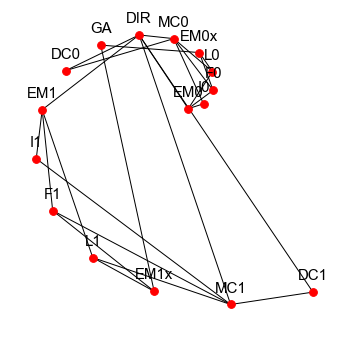

Link Predictions:
            Edge        CN  PA        JC        AA
0    (EM0, EM0x)  3.200000  12  0.400000  1.820478
1     (EM0, MC0)  4.800000  20  0.800000  3.821284
2      (EM0, GA)  1.066667   8  0.000000  0.000000
3     (EM0, DC0)  2.400000   8  0.200000  0.558111
4     (EM0, EM1)  2.400000  16  0.142857  0.558111
5      (EM0, I1)  1.066667   8  0.000000  0.000000
6      (EM0, F1)  1.066667  12  0.000000  0.000000
7      (EM0, L1)  1.066667  12  0.000000  0.000000
8    (EM0, EM1x)  0.800000  12  0.000000  0.000000
9     (EM0, MC1)  2.400000  20  0.125000  0.558111
10    (EM0, DC1)  2.400000   8  0.200000  0.558111
11      (I0, F0)  3.200000   6  0.666667  1.342682
12      (I0, L0)  3.200000   6  0.666667  1.342682
13    (I0, EM0x)  1.066667   6  0.000000  0.000000
14     (I0, DIR)  3.200000  12  0.333333  1.342682
15      (I0, GA)  0.800000   4  0.000000  0.000000
16     (I0, DC0)  2.400000   4  0.333333  0.621335
17     (I0, EM1)  1.066667   8  0.000000  0.000000
18      (I0, 

In [2]:
graph = DataFactory().create_graph_with_doubles(n=2, add_dc=True)
graph.draw(layout=GraphViz.SPIRAL_LAYOUT)

possible_edges = graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.print_results(title="Link Predictions:")

### Normalize results, filter edges of interest, label results and show metrics

In [3]:
gl.normalize()
gl.filter([("EM0","DC0"),("EM0", "DC1"),("EM1","DC0"),("EM1", "DC1"),
           ("EM0x","DC0"),("EM0x", "DC1"),("EM1x","DC0"),("EM1x", "DC1")])

gl.print_results(title="Predictions normalized:", incl_legend=False)
print()

gl.label(threshold=0.8)
gl.print_results(title="Prediction labels with threshold 0.8:", incl_legend=False)
print()

y_true = [1,0,0,1,0,0,0,0]
gl.print_metrics(y_true, title="Metrics:")

Predictions normalized:
          Edge        CN    PA   JC        AA
0   (EM0, DC0)  0.500000  0.32  0.2  0.146053
1   (EM0, DC1)  0.500000  0.32  0.2  0.146053
2   (EM1, DC0)  0.500000  0.32  0.2  0.146053
3   (EM1, DC1)  0.500000  0.32  0.2  0.146053
4  (EM0x, DC0)  0.222222  0.24  0.0  0.000000
5  (EM0x, DC1)  0.166667  0.24  0.0  0.000000
6  (EM1x, DC0)  0.166667  0.24  0.0  0.000000
7  (EM1x, DC1)  0.222222  0.24  0.0  0.000000

Prediction labels with threshold 0.8:
          Edge  CN  PA  JC  AA
0   (EM0, DC0)   0   0   0   0
1   (EM0, DC1)   0   0   0   0
2   (EM1, DC0)   0   0   0   0
3   (EM1, DC1)   0   0   0   0
4  (EM0x, DC0)   0   0   0   0
5  (EM0x, DC1)   0   0   0   0
6  (EM1x, DC0)   0   0   0   0
7  (EM1x, DC1)   0   0   0   0

Metrics:
      Metric   CN   PA   JC   AA
0  Precision  0.0  0.0  0.0  0.0
1     Recall  0.0  0.0  0.0  0.0
2   F1-Score  0.0  0.0  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficien

## 4.3 Tests

### Create link predictions and show metrics for edge samples of interest

In [4]:
n = 100
graph = DataFactory().create_graph_with_doubles(n=n, add_dc=True)

edges, labels = EdgeLabelFactory().sample("DC", "EM", n, p=0.1, shuffle=True)

gl = GraphLink(graph, edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.normalize()
gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric        CN        PA        JC        AA
0  Precision  0.500000  0.500000  0.500000  0.500000
1     Recall  1.000000  1.000000  1.000000  1.000000
2   F1-Score  0.666667  0.666667  0.666667  0.666667

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


### Create link predcitions for all possible edges first and then show metrics for edge samples of interest

In [5]:
n = 100
graph = DataFactory().create_graph_with_doubles(n=n, add_dc=True)

possible_edges =  graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.normalize()

edges, labels = EdgeLabelFactory().sample("DC", "EM", n, p=0.1, shuffle=True)
gl.filter(edges)

gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric        CN   PA   JC   AA
0  Precision  0.500000  0.0  0.0  0.0
1     Recall  1.000000  0.0  0.0  0.0
2   F1-Score  0.666667  0.0  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


---
_The end._